In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h1> Import dataset </h1>

In [2]:
data = pd.read_csv('dataset.csv')

In [3]:
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,distinct_trans_group_3month,distinct_ref_no_3month,most_act_mar2021_count,most_act_mar2021,total_act_mar2021,total_amt_mar2021,most_act_juin2021_count,most_act_juin2021,total_act_juin2021,total_amt_juin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,2,33,5.0,Giao dich chuyen khoan,5.0,0.000016,14.0,Giao dich chuyen khoan,17.0,0.006543
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,2,5,NaN,NaN,NaN,NaN,1.0,Giao dich thanh toan,1.0,0.000062
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,2,7,4.0,Giao dich chuyen khoan,6.0,0.000046,1.0,Giao dich chuyen khoan,2.0,0.000071
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,3,24,9.0,Giao dich chuyen khoan,10.0,0.000170,17.0,Giao dich chuyen khoan,19.0,0.000575


In [4]:
#Filter out customers who have transactions in both the last 1 month and in the last 3 months
data.dropna(axis = 0, subset = ['amount_month', 'amount_3month'], inplace = True)

In [5]:
#Categorize churn and active customers
data["Is_churn"] = np.where(
   (data['total_amt_mar2021'].isna() == True) & (data['total_amt_juin2021'].isna() == True), 1, 0)

In [6]:
data['Is_churn'].value_counts()

0    70628
1     6372
Name: Is_churn, dtype: int64

In [7]:
#Drop columns related to March and June
data = data.drop(['most_act_mar2021_count', 'most_act_mar2021', 'total_act_mar2021', 'total_amt_mar2021',
           'most_act_juin2021_count', 'most_act_juin2021', 'total_act_juin2021', 'total_amt_juin2021'], axis = 1)

<h1> Handing missing data </h1>

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77000 entries, 0 to 99997
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   local_ref_1                   74607 non-null  object 
 1   vn_marital_status             74357 non-null  object 
 2   resid_province                71332 non-null  float64
 3   resid_district                71332 non-null  float64
 4   resid_wards                   71330 non-null  float64
 5   birth_incorp_date             76992 non-null  float64
 6   amount_week                   54800 non-null  float64
 7   max_amount_week               54800 non-null  float64
 8   min_amount_week               54800 non-null  float64
 9   distinct_payment_code_week    55345 non-null  float64
 10  count_payment_code_week       55345 non-null  float64
 11  distinct_trans_group_week     55345 non-null  float64
 12  distinct_ref_no_week          55345 non-null  float64
 13  a

Column 'amount_week' is containing 22200 missing data. These null values ​​represent the customer with no transactions in the previous 1 week. Therefore, we will delete these null lines.

In [9]:
data = data[data['amount_week'].notna()]

We will check the dataset, which columns contain missing data

In [10]:
missing_data = data.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

local_ref_1
False    53149
True      1651
Name: local_ref_1, dtype: int64

vn_marital_status
False    52982
True      1818
Name: vn_marital_status, dtype: int64

resid_province
False    50988
True      3812
Name: resid_province, dtype: int64

resid_district
False    50991
True      3809
Name: resid_district, dtype: int64

resid_wards
False    50991
True      3809
Name: resid_wards, dtype: int64

birth_incorp_date
False    54796
True         4
Name: birth_incorp_date, dtype: int64

amount_week
False    54800
Name: amount_week, dtype: int64

max_amount_week
False    54800
Name: max_amount_week, dtype: int64

min_amount_week
False    54800
Name: min_amount_week, dtype: int64

distinct_payment_code_week
False    54800
Name: distinct_payment_code_week, dtype: int64

count_payment_code_week
False    54800
Name: count_payment_code_week, dtype: int64

distinct_trans_group_week
False    54800
Name: distinct_trans_group_week, dtype: int64

distinct_ref_no_week
False    54800
Name: distinct_ref_n

Thus, we currently have 6 columns containing missing values:
<ol>
    <li>"local_ref_1": 1651 missing data
    <li>"vn_marital_status": 1818 missing data
    <li>"resid_province": 3812 missing data
    <li>:"resid_district": 3809 missing data
    <li>:"resid_wards": 3809 missing data
    <li>:"birth_incorp_date": 4 missing data

<h2> Replace missing values of 'birth_incorp_date' column by mean </h2>

In [11]:
data['birth_incorp_date'] = 2020 - data[['birth_incorp_date']]

In [12]:
pd.options.display.max_rows = 999
data['birth_incorp_date'].value_counts()

28.0     3033
30.0     3008
29.0     2978
27.0     2870
26.0     2814
31.0     2601
32.0     2480
25.0     2359
33.0     2307
35.0     2285
24.0     2148
36.0     2102
34.0     2040
37.0     1988
23.0     1984
38.0     1801
39.0     1386
22.0     1379
40.0     1180
41.0     1076
21.0     1013
42.0      892
43.0      876
20.0      841
44.0      819
18.0      812
19.0      764
45.0      682
46.0      601
47.0      513
48.0      459
49.0      418
50.0      335
17.0      297
51.0      235
52.0      218
16.0      165
53.0      160
54.0      154
55.0      106
56.0       93
57.0       85
58.0       64
60.0       61
59.0       57
15.0       52
61.0       46
62.0       39
64.0       27
63.0       22
66.0       16
65.0        8
69.0        8
71.0        4
10.0        4
67.0        4
11.0        3
1.0         3
70.0        3
68.0        2
2.0         2
75.0        2
82.0        1
13.0        1
947.0       1
12.0        1
3.0         1
76.0        1
80.0        1
5.0         1
88.0        1
241.0 

In [13]:
data1 = data.loc[(data['birth_incorp_date'] < 101) & (data['birth_incorp_date'] > 5)]

In [14]:
avg_age = data1['birth_incorp_date'].mean(axis=0)
avg_age

32.024477056182235

In [15]:
data['birth_incorp_date'].replace(np.nan, 32, inplace = True)

We only observed customers between the ages of 6 and 100.

In [16]:
data = data.loc[(data['birth_incorp_date'] < 101) & (data['birth_incorp_date'] > 5)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54790 entries, 4 to 99993
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   local_ref_1                   53140 non-null  object 
 1   vn_marital_status             52973 non-null  object 
 2   resid_province                50980 non-null  float64
 3   resid_district                50983 non-null  float64
 4   resid_wards                   50983 non-null  float64
 5   birth_incorp_date             54790 non-null  float64
 6   amount_week                   54790 non-null  float64
 7   max_amount_week               54790 non-null  float64
 8   min_amount_week               54790 non-null  float64
 9   distinct_payment_code_week    54790 non-null  float64
 10  count_payment_code_week       54790 non-null  float64
 11  distinct_trans_group_week     54790 non-null  float64
 12  distinct_ref_no_week          54790 non-null  float64
 13  a

<h2> Handling missing data in 'vn_marital_status' column </h2>

In [17]:
data['age_group'] = 0

In [18]:
def impute_age_group(col):
    birth_incorp_date = col[0]
    if birth_incorp_date < 19:
        return '6_18'
    if birth_incorp_date < 41:
        return '19_40'
    else:
        return 'over 40'

In [19]:
data['age_group'] = data[['birth_incorp_date']].apply(impute_age_group, axis = 1)

In [20]:
data['test_column'] = 1
data_grtest = data[['vn_marital_status', 'age_group', 'test_column']]
group_test = data_grtest.groupby(['vn_marital_status', 'age_group'], as_index = False).sum()
group_test.sort_values('age_group')

,vn_marital_status,age_group,test_column
0,Divorced,19_40,12
2,Married,19_40,19807
5,Other,19_40,194
8,Partner,19_40,19
10,Seperated,19_40,2
12,Single,19_40,24000
15,Widow,19_40,2
3,Married,6_18,34
6,Other,6_18,1
13,Single,6_18,1296


From the above information, we will fill 'Single' for customers whose age_group is '19-40'; 'Married' for customers whose age_group is 'over 40'; 'Single' for customers whose age_group is '6-18'.

In [21]:
def impute_marrital_status(cols):
    vn_marital_status = cols[0]
    age_group = cols[1]
    if pd.isnull(vn_marital_status):
        if age_group == '6-18':
            return 'Single'
        if age_group == '19-40':
            return 'Single'
        else:
            return 'Married'
    else:
        return vn_marital_status

In [22]:
data['vn_marital_status'] = data[['vn_marital_status', 'age_group']].apply(impute_marrital_status, axis = 1)

<h2> Handling missing data in 'local_ref_1' column </h2>

We will fill missing values ​​of column 'local_ref_1' with frequent value based on 2 columns 'vn_marital_status' and 'age_group'.

In [23]:
data_grtest1 = data[['local_ref_1','vn_marital_status', 'age_group', 'test_column']]
group_test1 = data_grtest1.groupby(['local_ref_1','vn_marital_status', 'age_group'], as_index = False).sum()
group_test1.sort_values([ 'age_group', 'vn_marital_status'])

,local_ref_1,vn_marital_status,age_group,test_column
0,FEMALE,Divorced,19_40,7
14,MALE,Divorced,19_40,5
2,FEMALE,Married,19_40,7856
16,MALE,Married,19_40,12100
5,FEMALE,Other,19_40,88
19,MALE,Other,19_40,106
7,FEMALE,Partner,19_40,3
22,MALE,Partner,19_40,16
8,FEMALE,Seperated,19_40,2
10,FEMALE,Single,19_40,8428


In [24]:
def impute_sex(cols):
    sex = cols[0]
    age_group = cols[1]
    marital_status = cols[2]
    if pd.isnull(sex):
        if age_group == '6-18':
            if marital_status == 'Single':
                return 'FEMALE'
            else:
                return 'MALE'
        if age_group == '19-40':
            if marital_status == 'Divorced':
                return 'FEMALE'
            if marital_status == 'Married':
                return 'MALE'
            if marital_status == 'Other':
                return 'MALE'
            if marital_status == 'Partner':
                return 'MALE'
            if marital_status == 'Seperated':
                return 'FEMALE'
            else:
                return 'MALE'
        else:
            if marital_status == 'Divorced':
                return 'MALE'
            if marital_status == 'Married':
                return 'MALE'
            if marital_status == 'Other':
                return 'MALE'
            if marital_status == 'Partner':
                return 'MALE'
            if marital_status == 'Seperated':
                return 'FEMALE'
            else:
                return 'MALE'
    else:
        return sex

In [25]:
data['local_ref_1'] = data[['local_ref_1', 'age_group', 'vn_marital_status']].apply(impute_sex, axis = 1)

<h2> Handing missing data in 'resid_province' column by mode</h2>

In [26]:
# Find frequent value in column 'resid_provice'
data['resid_province'].value_counts().idxmax()

1.0

In [27]:
# Replace NaN values with '1'
data['resid_province'].replace(np.nan, 1, inplace = True)

We do not discover the relationship with the two fields 'resid_district' and 'resid_wards'.

In [28]:
data.drop(['resid_district', 'resid_wards'], axis = 1, inplace = True)

In [29]:
data.drop(['test_column', 'age_group'], axis = 1, inplace = True)

Note:
- Find customers who churn mostly in any age range.
        data_grtest2 = data[['birth_incorp_date', 'Is_churn', 'test_column']]
        group_test2 = data_grtest2.groupby(['birth_incorp_date', 'Is_churn'], as_index = False).sum()
        group_test2.sort_values('Is_churn')
- Create a new group_age from the found age range.
        def impute_age_group(col):
            birth_incorp_date = col[0]
            if birth_incorp_date < 16:
                 return '6_15'
            if birth_incorp_date < 46:
                 return '16_45'
            else:
                 return 'over 45'
        data['age_group'] = data[['birth_incorp_date']].apply(impute_age_group, axis = 1)
- See churn rate by age range.
         data_grtest3 = data[['age_group', 'Is_churn', 'test_column']]
         group_test3 = data_grtest3.groupby(['age_group', 'Is_churn'], as_index = False).sum()
         group_test3.sort_values('Is_churn')

In [30]:
# Create a variable 'diff_amount_month' which is the difference between the largest and smallest transaction in the previous 1 month
data['diff_amount_month'] = data['max_amount_month'] - data['min_amount_month']

In [31]:
# Create a variable 'diff_amount_week' which is the difference between the largest transaction and the smallest transaction in the previous 1 week
data['diff_amount_week'] = data['max_amount_week'] - data['min_amount_week']

In [32]:
# Create a variable 'diff_amount_3month' which is the difference between the largest and smallest transaction in the previous 3 months
data['diff_amount_3month'] = data['max_amount_3month'] - data['min_amount_3month']

## Handling Outliers

<h2> 1. 'birth_incorp_date' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='birth_incorp_date', ylabel='Density'>

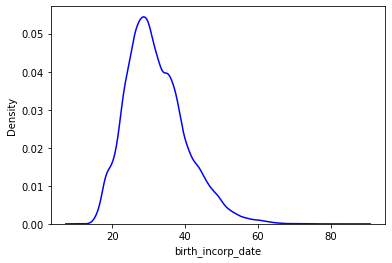

In [33]:
sns.distplot(data['birth_incorp_date'], hist = False, color = 'b')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='birth_incorp_date'>

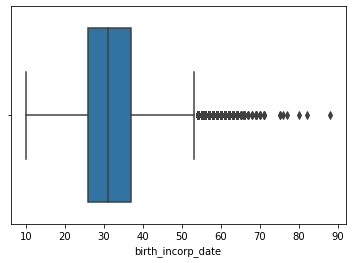

In [34]:
sns.boxplot('birth_incorp_date',data=data)

We will handle Outliers in 'birth_incorp_date' column by Binning.

In [35]:
birth_incorp_date = data['birth_incorp_date'].values.tolist()

def impute_birth_incorp_date(col):
    birth_incorp_date = col[0]
    if birth_incorp_date < 19:
        return '6-18'
    if birth_incorp_date < 31:
        return '19-30'
    if birth_incorp_date < 51:
        return '31-50'
    else:
        return 'Over 50'

In [36]:
data['birth_incorp_date'] = data[['birth_incorp_date']].apply(impute_birth_incorp_date, axis = 1)

In [37]:
data['birth_incorp_date'].value_counts()

31-50      26845
19-30      25191
Over 50     1419
6-18        1335
Name: birth_incorp_date, dtype: int64

<h2> 2. 'max_amount_week' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_week'>

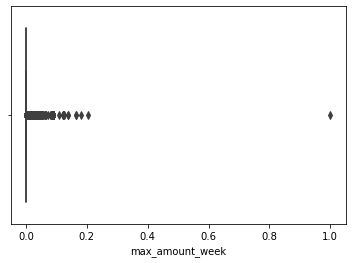

In [38]:
sns.boxplot('max_amount_week',data=data)

We will identify Outlier in 'max_amount_week' column by IQR method.

In [39]:
max_amount_week = data['max_amount_week'].values.tolist()
Q1 = np.percentile(data[['max_amount_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['max_amount_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['max_amount_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

We will handling Outliers in this column by Capping:
- If Outlier < low_lim, replace them by low_lim
- If Outlier > up_lim, replace them by up_lim

In [40]:
data['max_amount_week'] = np.where(data['max_amount_week'] > up_lim, up_lim, 
                               np.where(data['max_amount_week'] < low_lim, low_lim, data['max_amount_week']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_week'>

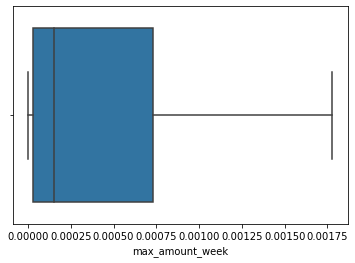

In [41]:
sns.boxplot('max_amount_week',data=data)

<h2> 3. 'min_amount_week' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_week'>

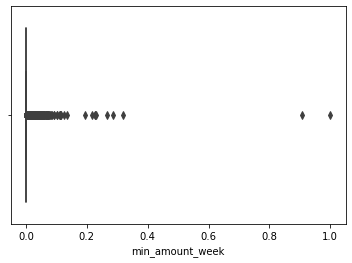

In [43]:
sns.boxplot('min_amount_week',data=data)

Use IQR to identify Outliers.

In [44]:
min_amount_week = data['min_amount_week'].values.tolist()
Q1 = np.percentile(data[['min_amount_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['min_amount_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['min_amount_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [45]:
data['min_amount_week'] = np.where(data['min_amount_week'] > up_lim, up_lim, 
                               np.where(data['min_amount_week'] < low_lim, low_lim, data['min_amount_week']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_week'>

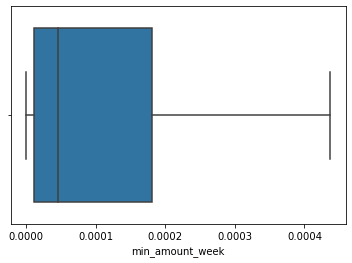

In [46]:
sns.boxplot('min_amount_week',data=data)

<h2> 4. 'diff_amount_week' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_week'>

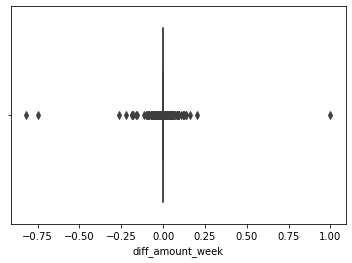

In [47]:
sns.boxplot('diff_amount_week',data=data)

Use IQR method to identify Outliers.

In [48]:
diff_amount_week = data['diff_amount_week'].values.tolist()
Q1 = np.percentile(data[['diff_amount_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['diff_amount_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['diff_amount_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [50]:
data['diff_amount_week'] = np.where(data['diff_amount_week'] > up_lim, up_lim, 
                               np.where(data['diff_amount_week'] < low_lim, low_lim, data['diff_amount_week']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_week'>

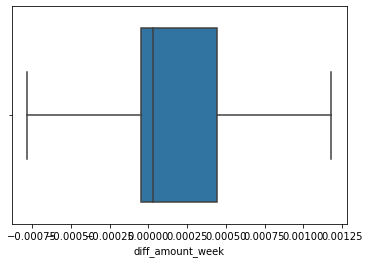

In [51]:
sns.boxplot('diff_amount_week',data=data)

<h2> 5. 'distinct_payment_code_week' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distinct_payment_code_week'>

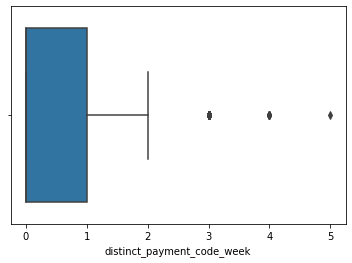

In [52]:
sns.boxplot('distinct_payment_code_week',data=data)

With Outliers in 'distinct_payment_code_week' column, we will handle them by Binning.

In [53]:
distinct_payment_code_week = data['distinct_payment_code_week'].values.tolist()

def impute_distinct_payment_code_week(col):
    distinct_payment_code_week = col[0]
    if distinct_payment_code_week < 2:
        return distinct_payment_code_week
    else:
        return 'Other'

In [54]:
data['distinct_payment_code_week'] = data[['distinct_payment_code_week']].apply(impute_distinct_payment_code_week, axis = 1)

In [55]:
data['distinct_payment_code_week'].value_counts()

0.0      37035
1.0      16482
Other     1273
Name: distinct_payment_code_week, dtype: int64

<h2> 6. 'count_payment_code_week' column

<AxesSubplot:ylabel='count_payment_code_week'>

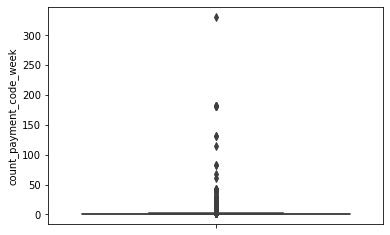

In [57]:
sns.boxplot(y='count_payment_code_week',data=data)

Use IQR method to identify Outliers.

In [58]:
count_payment_code_week = data['count_payment_code_week'].values.tolist()
Q1 = np.percentile(data[['count_payment_code_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['count_payment_code_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['count_payment_code_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [59]:
data['count_payment_code_week'] = np.where(data['count_payment_code_week'] > up_lim, up_lim, 
                               np.where(data['count_payment_code_week'] < low_lim, low_lim, data['count_payment_code_week']))

<AxesSubplot:ylabel='count_payment_code_week'>

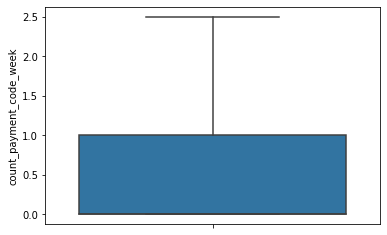

In [60]:
sns.boxplot(y='count_payment_code_week',data=data)

<h2> 7. 'distinct_trans_group_week' column


<AxesSubplot:xlabel='Is_churn', ylabel='distinct_trans_group_week'>

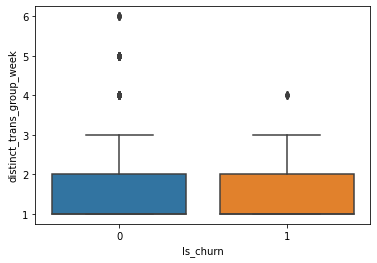

In [61]:
sns.boxplot(x = 'Is_churn', y='distinct_trans_group_week',data=data)

<AxesSubplot:ylabel='distinct_trans_group_week'>

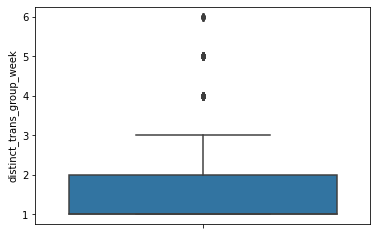

In [62]:
sns.boxplot(y = 'distinct_trans_group_week',data=data)

Handling Outliers by Binning.

In [63]:
distinct_trans_group_week = data['distinct_trans_group_week'].values.tolist()

def impute_distinct_trans_group_week(col):
    distinct_trans_group_week = col[0]
    if distinct_trans_group_week < 3:
        return distinct_trans_group_week
    else:
        return 'Other'

In [64]:
data['distinct_trans_group_week'] = data[['distinct_trans_group_week']].apply(impute_distinct_trans_group_week, axis = 1)

In [65]:
data['distinct_trans_group_week'].value_counts()

1.0      32842
2.0      17100
Other     4848
Name: distinct_trans_group_week, dtype: int64

<h2> 8. 'distinct_ref_no_week' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distinct_ref_no_week'>

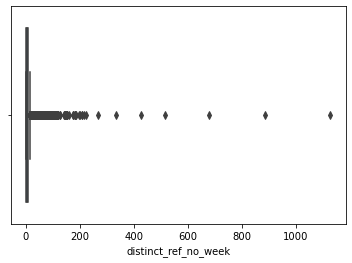

In [66]:
sns.boxplot('distinct_ref_no_week',data=data)

In [67]:
distinct_ref_no_week = data['distinct_ref_no_week'].values.tolist()
Q1 = np.percentile(data[['distinct_ref_no_week']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['distinct_ref_no_week']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['distinct_ref_no_week']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [68]:
data['distinct_ref_no_week'] = np.where(data['distinct_ref_no_week'] > up_lim, up_lim, 
                               np.where(data['distinct_ref_no_week'] < low_lim, low_lim, data['distinct_ref_no_week']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distinct_ref_no_week'>

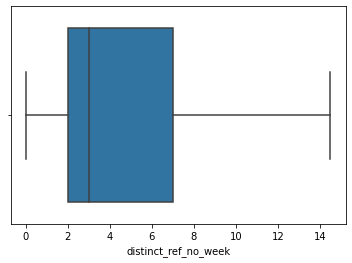

In [69]:
sns.boxplot('distinct_ref_no_week',data=data)

<h2> 9. 'amount_month' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_month', ylabel='Density'>

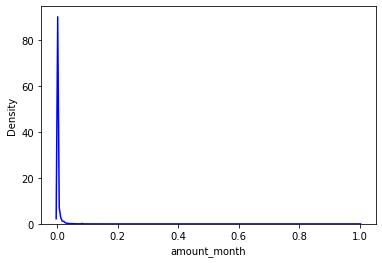

In [70]:
sns.distplot(data['amount_month'], hist = False, color = 'b')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_month'>

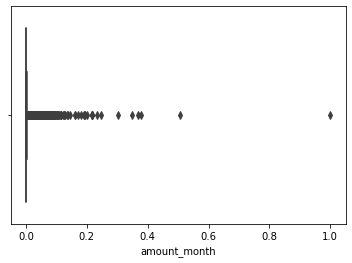

In [71]:
sns.boxplot('amount_month',data=data)

Use IQR to identify Outliers.

In [72]:
amount_month = data['amount_month'].values.tolist()
Q1 = np.percentile(data[['amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [73]:
data['amount_month'] = np.where(data['amount_month'] > up_lim, up_lim, 
                               np.where(data['amount_month'] < low_lim, low_lim, data['amount_month']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount_month'>

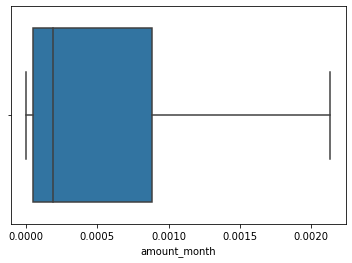

In [74]:
sns.boxplot('amount_month',data=data)

<h2> 10. 'max_amount_month' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_month'>

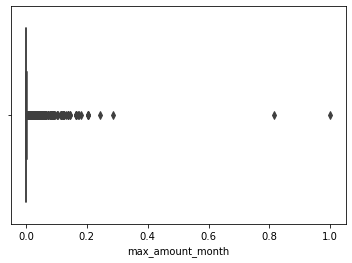

In [75]:
sns.boxplot('max_amount_month',data=data)

Use IQR method to identify Outliers.

In [77]:
max_amount_month = data['max_amount_month'].values.tolist()
Q1 = np.percentile(data[['max_amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['max_amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['max_amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

Handling Outliers by Capping.

In [79]:
data['max_amount_month'] = np.where(data['max_amount_month'] > up_lim, up_lim, 
                               np.where(data['max_amount_month'] < low_lim, low_lim, data['max_amount_month']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_month'>

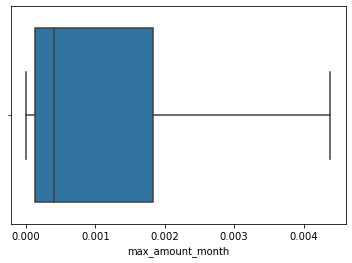

In [80]:
sns.boxplot('max_amount_month',data=data)

<h2> 11. 'min_amount_month' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_month'>

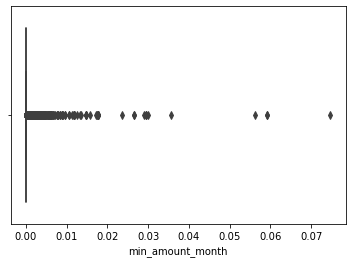

In [81]:
sns.boxplot('min_amount_month',data=data)

In [82]:
min_amount_month = data['min_amount_month'].values.tolist()
Q1 = np.percentile(data[['min_amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['min_amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['min_amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [83]:
data['min_amount_month'] = np.where(data['min_amount_month'] > up_lim, up_lim, 
                               np.where(data['min_amount_month'] < low_lim, low_lim, data['min_amount_month']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='min_amount_month'>

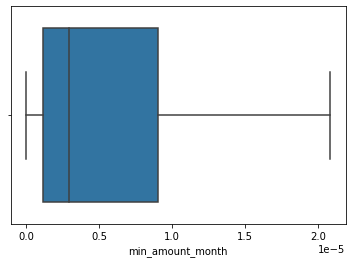

In [84]:
sns.boxplot('min_amount_month',data=data)

<h2> 12. 'diff_amount_month' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_month'>

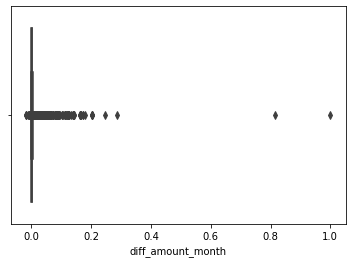

In [85]:
sns.boxplot('diff_amount_month',data=data)

In [86]:
diff_amount_month = data['diff_amount_month'].values.tolist()
Q1 = np.percentile(data[['diff_amount_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['diff_amount_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['diff_amount_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [87]:
data['diff_amount_month'] = np.where(data['diff_amount_month'] > up_lim, up_lim, 
                               np.where(data['diff_amount_month'] < low_lim, low_lim, data['diff_amount_month']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diff_amount_month'>

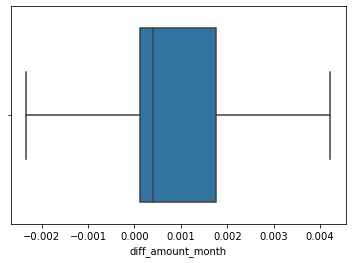

In [88]:
sns.boxplot('diff_amount_month',data=data)

<h2> 13. 'distinct_payment_code_month' column

<AxesSubplot:ylabel='distinct_payment_code_month'>

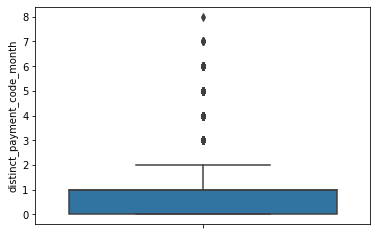

In [89]:
sns.boxplot(y='distinct_payment_code_month',data=data)

In [90]:
distinct_payment_code_month = data['distinct_payment_code_month'].values.tolist()

def impute_distinct_payment_code_month(col):
    distinct_payment_code_month = col[0]
    if distinct_payment_code_month < 3:
        return distinct_payment_code_month
    else:
        return 'Other'

In [91]:
data['distinct_payment_code_month'] = data[['distinct_payment_code_month']].apply(impute_distinct_payment_code_month, axis = 1)

In [92]:
data['distinct_payment_code_month'].value_counts()

1.0      24868
0.0      19940
2.0       6479
Other     3503
Name: distinct_payment_code_month, dtype: int64

<h2> 14. 'count_payment_code_month' column

<AxesSubplot:ylabel='count_payment_code_month'>

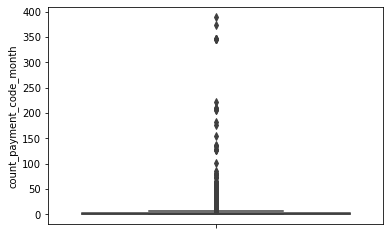

In [93]:
sns.boxplot(y='count_payment_code_month',data=data)

In [94]:
count_payment_code_month = data['count_payment_code_month'].values.tolist()
Q1 = np.percentile(data[['count_payment_code_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['count_payment_code_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['count_payment_code_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [95]:
data['count_payment_code_month'] = np.where(data['count_payment_code_month'] > up_lim, up_lim, 
                               np.where(data['count_payment_code_month'] < low_lim, low_lim, data['count_payment_code_month']))

<AxesSubplot:ylabel='count_payment_code_month'>

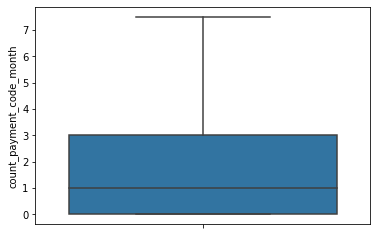

In [96]:
sns.boxplot(y='count_payment_code_month',data=data)

<h2> 15. 'distinct_trans_group_month' column

<AxesSubplot:ylabel='distinct_trans_group_month'>

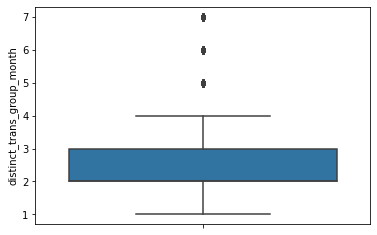

In [97]:
sns.boxplot(y='distinct_trans_group_month',data=data)

In [98]:
distinct_trans_group_month = data['distinct_trans_group_month'].values.tolist()

def impute_distinct_trans_group_month(col):
    distinct_trans_group_month = col[0]
    if distinct_trans_group_month < 4:
        return distinct_trans_group_month
    else:
        return 'Other'

In [99]:
data['distinct_trans_group_month'] = data[['distinct_trans_group_month']].apply(impute_distinct_trans_group_month, axis = 1)

In [100]:
data['distinct_trans_group_month'].value_counts()

2.0      24747
3.0      12473
1.0      11569
Other     6001
Name: distinct_trans_group_month, dtype: int64

<h2> 16. 'distinct_ref_no_month' column

<AxesSubplot:ylabel='distinct_ref_no_month'>

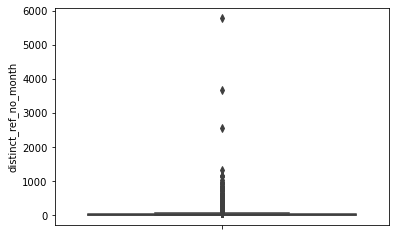

In [101]:
sns.boxplot(y = 'distinct_ref_no_month',data=data)

In [102]:
distinct_ref_no_month = data['distinct_ref_no_month'].values.tolist()
Q1 = np.percentile(data[['distinct_ref_no_month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['distinct_ref_no_month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['distinct_ref_no_month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [103]:
data['distinct_ref_no_month'] = np.where(data['distinct_ref_no_month'] > up_lim, up_lim, 
                               np.where(data['distinct_ref_no_month'] < low_lim, low_lim, data['distinct_ref_no_month']))

<AxesSubplot:ylabel='distinct_ref_no_month'>

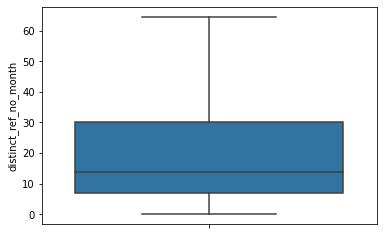

In [104]:
sns.boxplot(y = 'distinct_ref_no_month',data=data)

<h2> 17. 'amount_3month' column

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount_3month', ylabel='Density'>

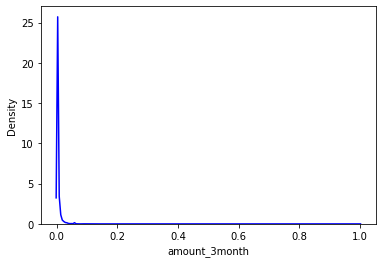

In [105]:
sns.distplot(data['amount_3month'], hist = False, color = 'b')

<AxesSubplot:ylabel='amount_3month'>

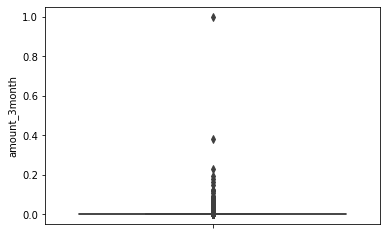

In [106]:
sns.boxplot(y = 'amount_3month',data=data)

In [107]:
amount_3month = data['amount_3month'].values.tolist()
Q1 = np.percentile(data[['amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [108]:
data['amount_3month'] = np.where(data['amount_3month'] > up_lim, up_lim, 
                               np.where(data['amount_3month'] < low_lim, low_lim, data['amount_3month']))

<AxesSubplot:ylabel='amount_3month'>

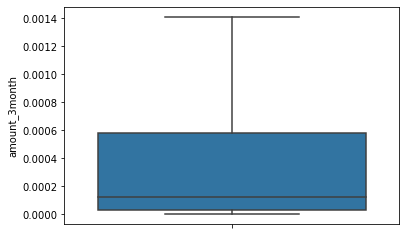

In [109]:
sns.boxplot(y = 'amount_3month',data=data)

<h2> 18. 'max_amount_3month' column

<AxesSubplot:ylabel='max_amount_3month'>

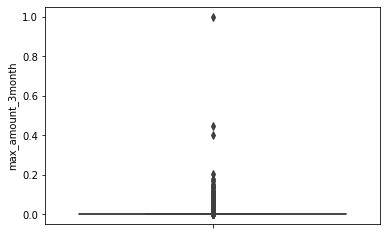

In [111]:
sns.boxplot(y = 'max_amount_3month',data=data)

In [112]:
max_amount_3month = data['max_amount_3month'].values.tolist()
Q1 = np.percentile(data[['max_amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['max_amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['max_amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [113]:
data['max_amount_3month'] = np.where(data['max_amount_3month'] > up_lim, up_lim, 
                               np.where(data['max_amount_3month'] < low_lim, low_lim, data['max_amount_3month']))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_amount_3month'>

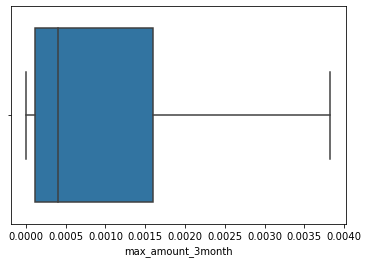

In [114]:
sns.boxplot('max_amount_3month',data=data)

<h2> 19. 'min_amount_3month' column

<AxesSubplot:ylabel='min_amount_3month'>

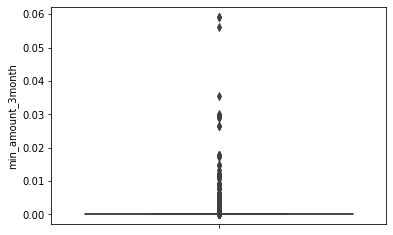

In [115]:
sns.boxplot(y = 'min_amount_3month',data=data)

In [116]:
min_amount_3month = data['min_amount_3month'].values.tolist()
Q1 = np.percentile(data[['min_amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['min_amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['min_amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [117]:
data['min_amount_3month'] = np.where(data['min_amount_3month'] > up_lim, up_lim, 
                               np.where(data['min_amount_3month'] < low_lim, low_lim, data['min_amount_3month']))

<AxesSubplot:ylabel='min_amount_3month'>

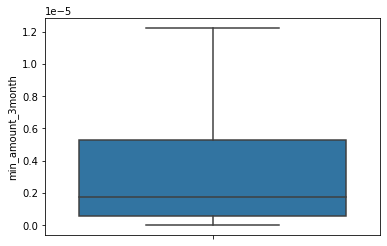

In [118]:
sns.boxplot(y = 'min_amount_3month',data=data)

<h2> 20. 'diff_amount_3month' column

<AxesSubplot:ylabel='diff_amount_3month'>

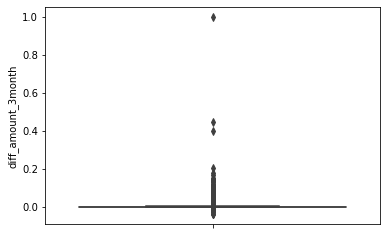

In [119]:
sns.boxplot(y = 'diff_amount_3month',data=data)

In [120]:
diff_amount_3month = data['diff_amount_3month'].values.tolist()
Q1 = np.percentile(data[['diff_amount_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['diff_amount_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['diff_amount_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [121]:
data['diff_amount_3month'] = np.where(data['diff_amount_3month'] > up_lim, up_lim, 
                               np.where(data['diff_amount_3month'] < low_lim, low_lim, data['diff_amount_3month']))

<AxesSubplot:ylabel='diff_amount_3month'>

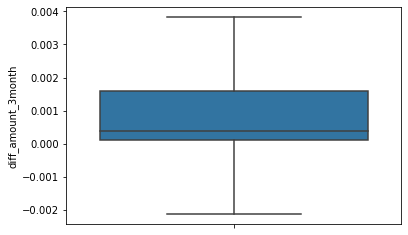

In [122]:
sns.boxplot(y = 'diff_amount_3month',data=data)

<h2> 21. 'distinct_payment_code_3month' column


<AxesSubplot:ylabel='distinct_payment_code_3month'>

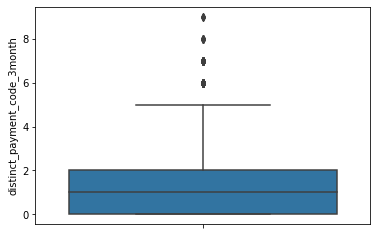

In [123]:
sns.boxplot(y = 'distinct_payment_code_3month',data=data)

In [124]:
distinct_payment_code_3month = data['distinct_payment_code_3month'].values.tolist()

def impute_distinct_payment_code_3month(col):
    distinct_payment_code_3month = col[0]
    if distinct_payment_code_3month < 4:
        return distinct_payment_code_3month
    else:
        return 'Other'

In [125]:
data['distinct_payment_code_3month'] = data[['distinct_payment_code_3month']].apply(impute_distinct_payment_code_3month, axis = 1)

In [126]:
data['distinct_payment_code_3month'].value_counts()

1        26206
0        13934
2         8290
3         3975
Other     2385
Name: distinct_payment_code_3month, dtype: int64

<h2> 22. 'count_payment_code_3month' column

<AxesSubplot:ylabel='count_payment_code_3month'>

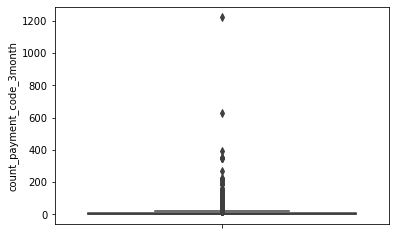

In [128]:
sns.boxplot(y='count_payment_code_3month',data=data)

In [129]:
count_payment_code_3month = data['count_payment_code_3month'].values.tolist()
Q1 = np.percentile(data[['count_payment_code_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['count_payment_code_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['count_payment_code_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [130]:
data['count_payment_code_3month'] = np.where(data['count_payment_code_3month'] > up_lim, up_lim, 
                               np.where(data['count_payment_code_3month'] < low_lim, low_lim, data['count_payment_code_3month']))

<AxesSubplot:ylabel='count_payment_code_3month'>

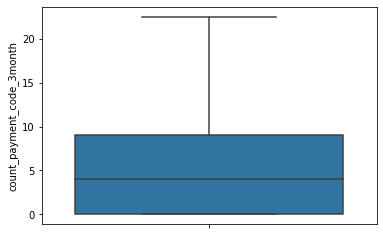

In [131]:
sns.boxplot(y='count_payment_code_3month',data=data)

<h2> 23. 'distinct_trans_group_3month' column

<AxesSubplot:ylabel='distinct_trans_group_3month'>

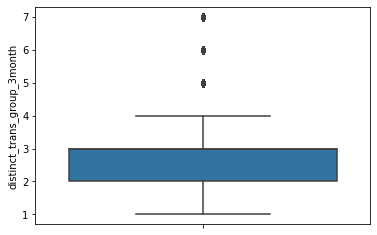

In [132]:
sns.boxplot(y='distinct_trans_group_3month',data=data)

In [133]:
distinct_trans_group_3month = data['distinct_trans_group_3month'].values.tolist()

def impute_distinct_trans_group_3month(col):
    distinct_trans_group_3month = col[0]
    if distinct_trans_group_3month < 5:
        return distinct_trans_group_3month
    else:
        return 'Other'

In [134]:
data['distinct_trans_group_3month'] = data[['distinct_trans_group_3month']].apply(impute_distinct_trans_group_3month, axis = 1)

In [135]:
data['distinct_trans_group_3month'].value_counts()

3        23593
2        13764
4         9126
Other     4447
1         3860
Name: distinct_trans_group_3month, dtype: int64

<h2> 24. 'distinct_ref_no_3month' column

<AxesSubplot:ylabel='distinct_ref_no_3month'>

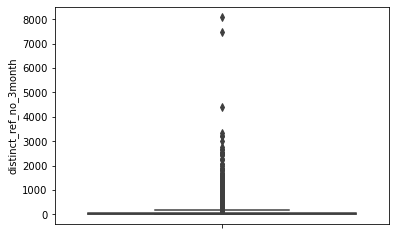

In [136]:
sns.boxplot(y ='distinct_ref_no_3month',data=data)

In [137]:
distinct_ref_no_3month = data['distinct_ref_no_3month'].values.tolist()
Q1 = np.percentile(data[['distinct_ref_no_3month']], 25, interpolation = 'midpoint')
Q2 = np.percentile(data[['distinct_ref_no_3month']], 50, interpolation = 'midpoint')
Q3 = np.percentile(data[['distinct_ref_no_3month']], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [138]:
data['distinct_ref_no_3month'] = np.where(data['distinct_ref_no_3month'] > up_lim, up_lim, 
                               np.where(data['distinct_ref_no_3month'] < low_lim, low_lim, data['distinct_ref_no_3month']))

<AxesSubplot:ylabel='distinct_ref_no_3month'>

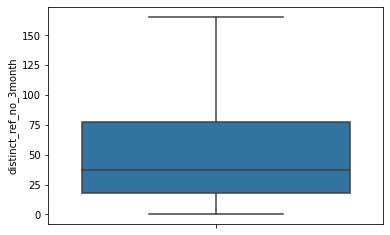

In [139]:
sns.boxplot(y = 'distinct_ref_no_3month',data=data)

## Data Normalization

In [140]:
data.describe()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,distinct_ref_no_month,amount_3month,max_amount_3month,min_amount_3month,count_payment_code_3month,distinct_ref_no_3month,Is_churn,diff_amount_month,diff_amount_week,diff_amount_3month
count,54790.000000,54790.00000,5.479000e+04,54790.000000,54790.000000,54790.000000,5.479000e+04,5.479000e+04,54790.000000,54790.000000,54790.000000,5.479000e+04,5.479000e+04,5.479000e+04,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000
mean,32.401643,0.00059,4.760065e-04,0.000122,0.472851,5.115094,5.914523e-04,1.228400e-03,0.000006,2.013068,21.111015,3.893395e-04,1.075430e-03,3.549816e-06,5.511453,54.553888,0.045556,0.001177,0.000202,0.001059
std,29.001154,0.00615,6.227605e-04,0.000153,0.764433,4.443873,7.547197e-04,1.525788e-03,0.000007,2.264628,18.700828,4.957798e-04,1.337041e-03,3.769087e-06,6.042546,48.718725,0.208522,0.001489,0.000543,0.001347
min,0.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,2.800000e-10,2.040000e-09,0.000000,0.000000,0.000000,6.570000e-11,1.000000e-09,0.000000e+00,0.000000,0.000000,0.000000,-0.002339,-0.000783,-0.002137
25%,1.000000,0.00000,3.060000e-05,0.000011,0.000000,2.000000,4.980000e-05,1.378060e-04,0.000001,0.000000,7.000000,3.360000e-05,1.160000e-04,6.090000e-07,0.000000,18.000000,0.000000,0.000120,-0.000047,0.000103
50%,31.000000,0.00000,1.551020e-04,0.000045,0.000000,3.000000,1.905340e-04,4.081630e-04,0.000003,1.000000,14.000000,1.272535e-04,4.000000e-04,1.770000e-06,4.000000,37.000000,0.000000,0.000407,0.000027,0.000394
75%,51.000000,0.00000,7.297960e-04,0.000182,1.000000,7.000000,8.831660e-04,1.836735e-03,0.000009,3.000000,30.000000,5.851687e-04,1.600000e-03,5.260000e-06,9.000000,77.000000,0.000000,0.001760,0.000444,0.001596
max,96.000000,1.00000,1.778590e-03,0.000437,2.500000,14.500000,2.133215e-03,4.385052e-03,0.000021,7.500000,64.500000,1.412331e-03,3.826000e-03,1.223650e-05,22.500000,165.500000,1.000000,0.004219,0.001181,0.003837


We will Normalize the Min-Max method for the following columns:
- resid_province                
- max_amount_week  
- min_amount_week               
- count_payment_code_week       
- distinct_ref_no_week          
- amount_month                  
- max_amount_month              
- min_amount_month              
- count_payment_code_month      
- distinct_ref_no_month         
- amount_3month                 
- max_amount_3month             
- min_amount_3month             
- count_payment_code_3month     
- distinct_ref_no_3month        
- diff_amount_month             
- diff_amount_week              
- diff_amount_3month 

We will Normalize by Dummy variable method with the following columns:
- local_ref_1                   
- vn_marital_status             
- birth_incorp_date             
- distinct_payment_code_week    
- distinct_trans_group_week     
- distinct_payment_code_month   
- distinct_trans_group_month    
- distinct_payment_code_3month  
- distinct_trans_group_3month   

<h2> Dummy variable

In [141]:
categorical_columns = ['local_ref_1', 'vn_marital_status', 'birth_incorp_date', 'distinct_payment_code_week'
                      , 'distinct_trans_group_week', 'distinct_payment_code_month', 'distinct_trans_group_month'
                      , 'distinct_payment_code_3month', 'distinct_trans_group_3month']

prefix = ['sex', 'marital_status', 'age', 'payment_code_week', 'trans_group_week', 'payment_code_month', 
         'trans_group_month', 'payment_code_3month', 'trans_group_3month']

data = pd.get_dummies(data = data, prefix = prefix, prefix_sep = '_', 
                      columns = categorical_columns, drop_first = False, dtype = 'int8')

In [142]:
data.head()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,...,payment_code_3month_0,payment_code_3month_1,payment_code_3month_2,payment_code_3month_3,payment_code_3month_Other,trans_group_3month_1,trans_group_3month_2,trans_group_3month_3,trans_group_3month_4,trans_group_3month_Other
4,49.0,0.0,0.000114,0.000437,0.0,1.0,0.000097,0.000247,0.000001,5.0,...,0,1,0,0,0,0,0,1,0,0
7,38.0,0.0,0.000476,0.000011,0.0,11.0,0.000468,0.000571,0.000003,0.0,...,0,1,0,0,0,0,0,1,0,0
12,56.0,0.0,0.000014,0.000079,0.0,1.0,0.000011,0.000016,0.000003,3.0,...,0,1,0,0,0,0,0,1,0,0
17,92.0,0.0,0.000449,0.000437,0.0,4.0,0.000476,0.000449,0.000003,3.0,...,0,0,1,0,0,0,0,0,0,1
18,38.0,0.0,0.001429,0.000437,0.0,6.0,0.001129,0.001429,0.000006,0.0,...,1,0,0,0,0,0,0,1,0,0


<h2> Min-Max Normalization

In [143]:
data['max_amount_week'] = (data['max_amount_week'] - data['max_amount_week'].min()) / (data['max_amount_week'].max() - data['max_amount_week'].min())

In [144]:
data['min_amount_week'] = (data['min_amount_week'] - data['min_amount_week'].min()) / (data['min_amount_week'].max() - data['min_amount_week'].min())

In [145]:
data['count_payment_code_week'] = (data['count_payment_code_week'] - data['count_payment_code_week'].min()) / (data['count_payment_code_week'].max() - data['count_payment_code_week'].min())

In [146]:
data['distinct_ref_no_week'] = (data['distinct_ref_no_week'] - data['distinct_ref_no_week'].min()) / (data['distinct_ref_no_week'].max() - data['distinct_ref_no_week'].min())

In [147]:
data['amount_month'] = (data['amount_month'] - data['amount_month'].min()) / (data['amount_month'].max() - data['amount_month'].min())

In [148]:
data['max_amount_month'] = (data['max_amount_month'] - data['max_amount_month'].min()) / (data['max_amount_month'].max() - data['max_amount_month'].min())

In [149]:
data['min_amount_month'] = (data['min_amount_month'] - data['min_amount_month'].min()) / (data['min_amount_month'].max() - data['min_amount_month'].min())

In [150]:
data['count_payment_code_month'] = (data['count_payment_code_month'] - data['count_payment_code_month'].min()) / (data['count_payment_code_month'].max() - data['count_payment_code_month'].min())

In [151]:
data['distinct_ref_no_month'] = (data['distinct_ref_no_month'] - data['distinct_ref_no_month'].min()) / (data['distinct_ref_no_month'].max() - data['distinct_ref_no_month'].min())

In [152]:
data['amount_3month'] = (data['amount_3month'] - data['amount_3month'].min()) / (data['amount_3month'].max() - data['amount_3month'].min())

In [153]:
data['max_amount_3month'] = (data['max_amount_3month'] - data['max_amount_3month'].min()) / (data['max_amount_3month'].max() - data['max_amount_3month'].min())

In [154]:
data['min_amount_3month'] = (data['min_amount_3month'] - data['min_amount_3month'].min()) / (data['min_amount_3month'].max() - data['min_amount_3month'].min())

In [155]:
data['count_payment_code_3month'] = (data['count_payment_code_3month'] - data['count_payment_code_3month'].min()) / (data['count_payment_code_3month'].max() - data['count_payment_code_3month'].min())

In [156]:
data['distinct_ref_no_3month'] = (data['distinct_ref_no_3month'] - data['distinct_ref_no_3month'].min()) / (data['distinct_ref_no_3month'].max() - data['distinct_ref_no_3month'].min())

In [157]:
data['diff_amount_month'] = (data['diff_amount_month'] - data['diff_amount_month'].min()) / (data['diff_amount_month'].max() - data['diff_amount_month'].min())

In [158]:
data['diff_amount_week'] = (data['diff_amount_week'] - data['diff_amount_week'].min()) / (data['diff_amount_week'].max() - data['diff_amount_week'].min())

In [159]:
data['diff_amount_3month'] = (data['diff_amount_3month'] - data['diff_amount_3month'].min()) / (data['diff_amount_3month'].max() - data['diff_amount_3month'].min())

In [160]:
data.describe()

,resid_province,amount_week,max_amount_week,min_amount_week,count_payment_code_week,distinct_ref_no_week,amount_month,max_amount_month,min_amount_month,count_payment_code_month,...,payment_code_3month_0,payment_code_3month_1,payment_code_3month_2,payment_code_3month_3,payment_code_3month_Other,trans_group_3month_1,trans_group_3month_2,trans_group_3month_3,trans_group_3month_4,trans_group_3month_Other
count,54790.000000,54790.00000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,...,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000,54790.000000
mean,32.401643,0.00059,0.267631,0.278953,0.189140,0.352765,0.277259,0.280133,0.311214,0.268409,...,0.254316,0.478299,0.151305,0.072550,0.043530,0.070451,0.251214,0.430608,0.166563,0.081164
std,29.001154,0.00615,0.350143,0.350383,0.305773,0.306474,0.353795,0.347952,0.333123,0.301950,...,0.435480,0.499533,0.358349,0.259398,0.204048,0.255908,0.433715,0.495166,0.372589,0.273090
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.017204,0.026083,0.000000,0.137931,0.023345,0.031426,0.056581,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,31.000000,0.00000,0.087204,0.103873,0.000000,0.206897,0.089318,0.093080,0.141932,0.133333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,0.00000,0.410322,0.415650,0.400000,0.482759,0.414007,0.418862,0.433949,0.400000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,96.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [161]:
corr = data.corr()

In [162]:
corr['Is_churn'].sort_values()

distinct_ref_no_3month      -0.111258
distinct_ref_no_month       -0.110730
diff_amount_3month          -0.101335
diff_amount_week            -0.099806
diff_amount_month           -0.099315
amount_3month               -0.093126
distinct_ref_no_week        -0.092334
amount_month                -0.091895
max_amount_3month           -0.091602
max_amount_month            -0.086161
max_amount_week             -0.079971
count_payment_code_3month   -0.079773
count_payment_code_month    -0.067064
trans_group_month_Other     -0.058403
trans_group_3month_Other    -0.057240
trans_group_3month_4        -0.052797
payment_code_3month_3       -0.052668
payment_code_3month_2       -0.051211
payment_code_month_2.0      -0.051003
trans_group_3month_3        -0.050873
payment_code_month_Other    -0.049941
marital_status_Married      -0.046067
trans_group_month_3.0       -0.040333
trans_group_week_Other      -0.039097
payment_code_3month_Other   -0.035025
sex_FEMALE                  -0.030398
age_31-50   

In [164]:
df = data[['distinct_ref_no_3month', 'distinct_ref_no_month', 'trans_group_3month_1', 'diff_amount_3month',
          'diff_amount_week', 'diff_amount_month', 'trans_group_month_1.0', 'amount_3month', 'distinct_ref_no_week',
          'amount_month', 'max_amount_3month']]

<AxesSubplot:xlabel='distinct_ref_no_3month', ylabel='Is_churn'>

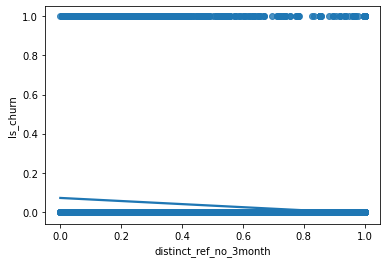

In [165]:
sns.regplot(x = 'distinct_ref_no_3month', y = 'Is_churn', data = data)

In [167]:
from scipy import stats 
pearson_coef, p_value = stats.pearsonr(data['distinct_ref_no_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.11125841716072146  with a P-value of P = 1.9931790157089803e-150


<AxesSubplot:xlabel='Is_churn', ylabel='distinct_ref_no_3month'>

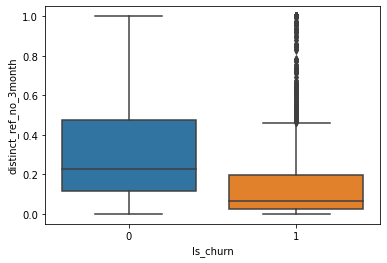

In [168]:
sns.boxplot(x = 'Is_churn', y = 'distinct_ref_no_3month', data = data)

In [169]:
data_churn = data[data['Is_churn'] == 1]
data_active = data[data['Is_churn'] == 0]

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


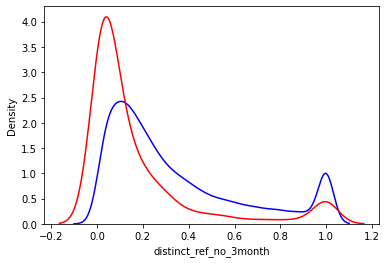

In [170]:
ax1 = sns.distplot(data_active['distinct_ref_no_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['distinct_ref_no_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

In [171]:
data_churn['distinct_ref_no_3month'].mode()

0    0.018127
dtype: float64

<h5>Looking at the chart above, we see that when the values ​​of the 'distinct_ref_no_3month' column increase from the min value to 0.018, customers tend to churn. However, when the value of the column 'distinct_ref_no_3month' continued to increase from 0.018, the number of active customers greatly increased.</h5>

<AxesSubplot:xlabel='distinct_ref_no_month', ylabel='Is_churn'>

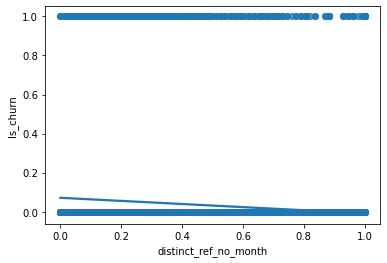

In [172]:
sns.regplot(x = 'distinct_ref_no_month', y = 'Is_churn', data = data)

In [173]:
pearson_coef, p_value = stats.pearsonr(data['distinct_ref_no_month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.11073004109119988  with a P-value of P = 5.181560041986308e-149


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


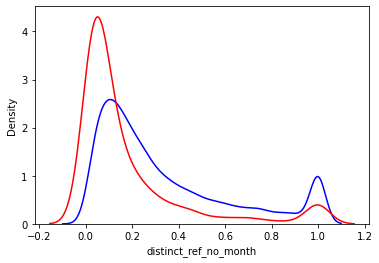

In [174]:
ax1 = sns.distplot(data_active['distinct_ref_no_month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['distinct_ref_no_month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

In [175]:
data_churn['distinct_ref_no_month'].mode()

0    0.015504
dtype: float64

<h5> Similar to the trend histogram of column 'distinct_ref_no_3month', customers tend to be churn as values ​​in column 'distinct_ref_no_month' increase from min value to 0.015. <h5>

<AxesSubplot:xlabel='trans_group_3month_1', ylabel='Is_churn'>

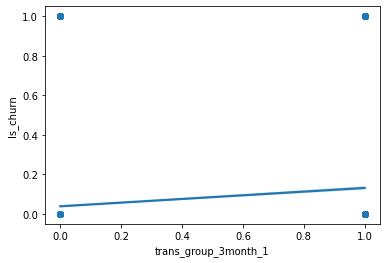

In [176]:
sns.regplot(x = 'trans_group_3month_1', y = 'Is_churn', data = data)

In [177]:
pearson_coef, p_value = stats.pearsonr(data['trans_group_3month_1'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.11395112772791523  with a P-value of P = 9.590803113555227e-158


<AxesSubplot:xlabel='Is_churn', ylabel='count'>

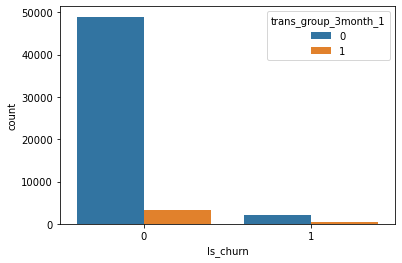

In [178]:
sns.countplot(x = 'Is_churn', hue = 'trans_group_3month_1', data = data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


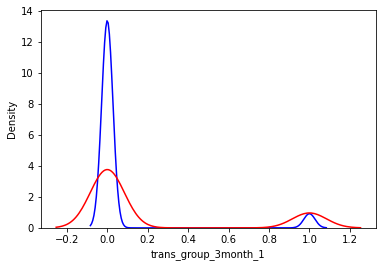

In [179]:
ax1 = sns.distplot(data_active['trans_group_3month_1'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['trans_group_3month_1'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='diff_amount_3month', ylabel='Is_churn'>

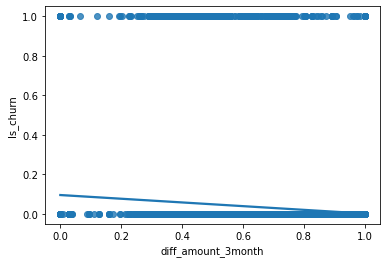

In [180]:
sns.regplot(x = 'diff_amount_3month', y = 'Is_churn', data = data)

In [181]:
pearson_coef, p_value = stats.pearsonr(data['diff_amount_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.10133491058661155  with a P-value of P = 5.325451515574425e-125


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


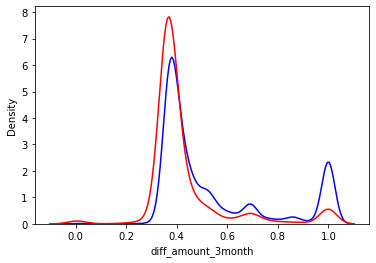

In [182]:
ax1 = sns.distplot(data_active['diff_amount_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['diff_amount_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<h5> We discover that the number of customers leaving tends to increase sharply if the difference between their transactions in the previous 3 months is between 0.2 and 0.4. </h5>

<AxesSubplot:xlabel='diff_amount_week', ylabel='Is_churn'>

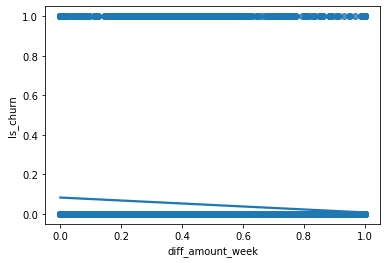

In [183]:
sns.regplot(x = 'diff_amount_week', y = 'Is_churn', data = data)

In [184]:
pearson_coef, p_value = stats.pearsonr(data['diff_amount_week'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09980643760480298  with a P-value of P = 2.6787426765183777e-121


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


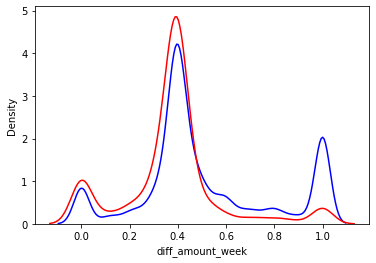

In [185]:
ax1 = sns.distplot(data_active['diff_amount_week'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['diff_amount_week'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<h5>In this column, we see that when the difference in customer transactions within the previous 1 week increases from min value to 0.4, both customer churn and active tend to increase sharply. However, at this range of values, the difference between the number of churn customers and the active customers is small. However, at the '1' value of the 'diff_amount_week' column, we see that customers tend to be active rather than churn.</h5>

<AxesSubplot:xlabel='diff_amount_month', ylabel='Is_churn'>

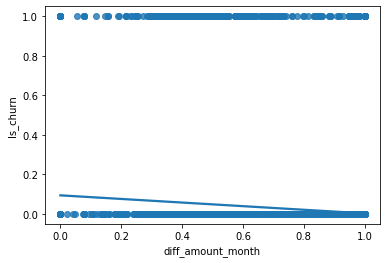

In [187]:
sns.regplot(x = 'diff_amount_month', y = 'Is_churn', data = data)

In [188]:
pearson_coef, p_value = stats.pearsonr(data['diff_amount_month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09931458993141892  with a P-value of P = 4.044818517905089e-120


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


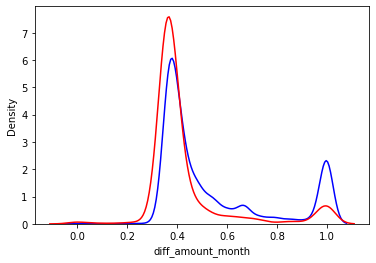

In [189]:
ax1 = sns.distplot(data_active['diff_amount_month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['diff_amount_month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='trans_group_month_1.0', ylabel='Is_churn'>

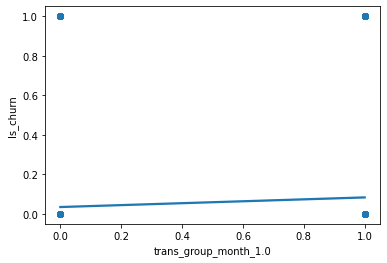

In [190]:
sns.regplot(x = 'trans_group_month_1.0', y = 'Is_churn', data = data)

In [191]:
pearson_coef, p_value = stats.pearsonr(data['trans_group_month_1.0'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.09521533916819441  with a P-value of P = 1.5952332402501308e-110


<AxesSubplot:xlabel='Is_churn', ylabel='count'>

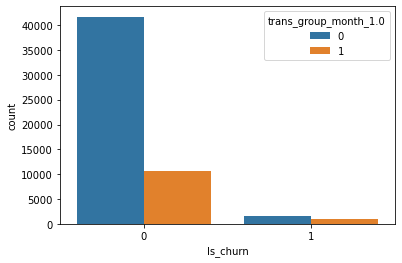

In [192]:
sns.countplot(x = 'Is_churn', hue = 'trans_group_month_1.0', data = data)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


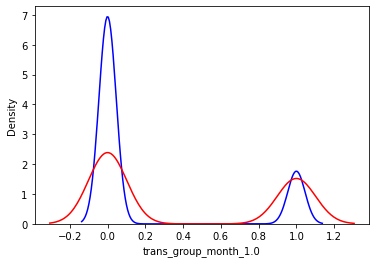

In [193]:
ax1 = sns.distplot(data_active['trans_group_month_1.0'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['trans_group_month_1.0'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='amount_3month', ylabel='Is_churn'>

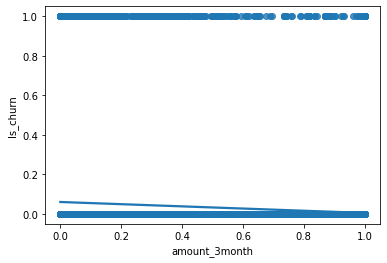

In [194]:
sns.regplot(x = 'amount_3month', y = 'Is_churn', data = data)

In [195]:
pearson_coef, p_value = stats.pearsonr(data['amount_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09312640836282726  with a P-value of P = 8.609948157869148e-106


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


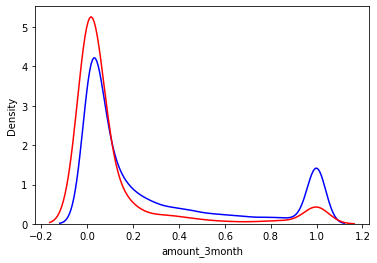

In [196]:
ax1 = sns.distplot(data_active['amount_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['amount_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='distinct_ref_no_week', ylabel='Is_churn'>

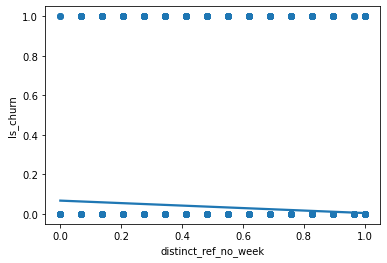

In [197]:
sns.regplot(x = 'distinct_ref_no_week', y = 'Is_churn', data = data)

In [198]:
pearson_coef, p_value = stats.pearsonr(data['distinct_ref_no_week'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09233381831622933  with a P-value of P = 5.0426803002158404e-104


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


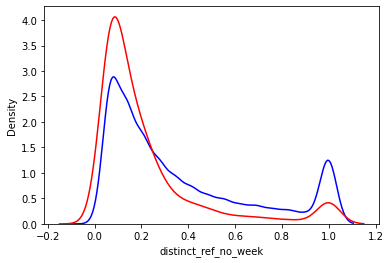

In [199]:
ax1 = sns.distplot(data_active['distinct_ref_no_week'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['distinct_ref_no_week'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='amount_month', ylabel='Is_churn'>

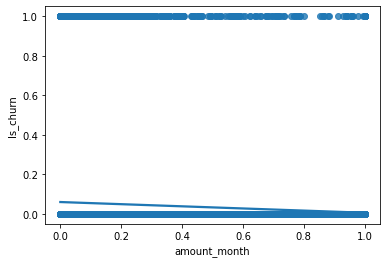

In [200]:
sns.regplot(x = 'amount_month', y = 'Is_churn', data = data)

In [201]:
pearson_coef, p_value = stats.pearsonr(data['amount_month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09189463399307016  with a P-value of P = 4.73756489664431e-103


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


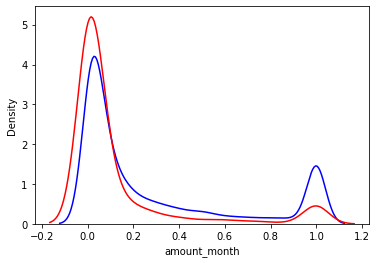

In [202]:
ax1 = sns.distplot(data_active['amount_month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['amount_month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

<AxesSubplot:xlabel='max_amount_3month', ylabel='Is_churn'>

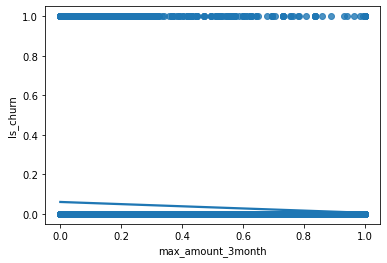

In [203]:
sns.regplot(x = 'max_amount_3month', y = 'Is_churn', data = data)

In [204]:
pearson_coef, p_value = stats.pearsonr(data['max_amount_3month'], data['Is_churn'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is -0.09160221258491974  with a P-value of P = 2.092811980434715e-102


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


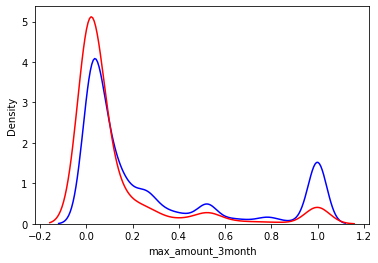

In [205]:
ax1 = sns.distplot(data_active['max_amount_3month'], hist = False, color = 'b', label = 'Active Customer')
sns.distplot(data_churn['max_amount_3month'], hist = False, color = 'r', label = 'Churn Customer', ax = ax1)
plt.show()

## Handling Imbalanced Data

In [211]:
from sklearn.model_selection import train_test_split

<AxesSubplot:xlabel='Is_churn', ylabel='count'>

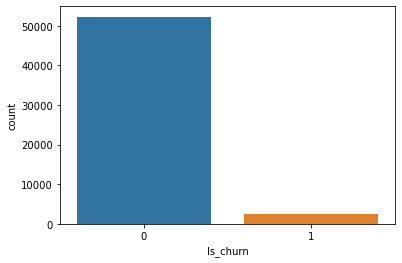

In [207]:
sns.countplot(x = 'Is_churn', data = data)

First, we split the dataset into data_train and data_test.

In [208]:
data_train, data_test = train_test_split(data, test_size = 0.2, stratify = data['Is_churn'], random_state = 999)

In [209]:
data_train['Is_churn'].value_counts()

0    41835
1     1997
Name: Is_churn, dtype: int64

In [210]:
data_test['Is_churn'].value_counts()

0    10459
1      499
Name: Is_churn, dtype: int64

<h2> OverSampling

We perform OverSampling on the data_train set.

In [212]:
from imblearn.over_sampling import RandomOverSampler

In [213]:
ros = RandomOverSampler(random_state = 999)
x = data_train.drop('Is_churn', axis = 1)
y = data_train['Is_churn']
x_resampled, y_resampled = ros.fit_resample(x, y)

In [214]:
y_resampled.value_counts()

1    41835
0    41835
Name: Is_churn, dtype: int64

In [215]:
data_train = pd.concat([x_resampled, y_resampled], axis = 1)

<AxesSubplot:xlabel='Is_churn', ylabel='count'>

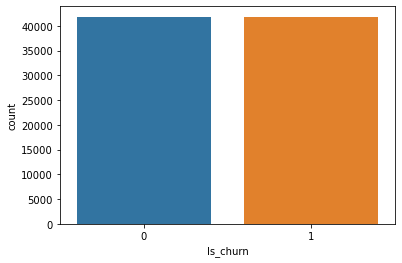

In [216]:
sns.countplot(x = 'Is_churn', data = data_train)

## Model by Logistic Regression

In [217]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import PolynomialFeatures

In [218]:
x_train = data_train[['distinct_ref_no_3month', 'distinct_ref_no_month', 'trans_group_3month_1', 'diff_amount_3month',
          'diff_amount_week', 'diff_amount_month', 'trans_group_month_1.0', 'amount_3month', 'distinct_ref_no_week',
          'amount_month', 'max_amount_3month']]
y_train = data_train['Is_churn']
x_test = data_test[['distinct_ref_no_3month', 'distinct_ref_no_month', 'trans_group_3month_1', 'diff_amount_3month',
          'diff_amount_week', 'diff_amount_month', 'trans_group_month_1.0', 'amount_3month', 'distinct_ref_no_week',
          'amount_month', 'max_amount_3month']]
y_test = data_test['Is_churn']

In [219]:
lr = LogisticRegression(max_iter = 1000)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     10459
           1       0.08      0.72      0.14       499

    accuracy                           0.60     10958
   macro avg       0.53      0.66      0.44     10958
weighted avg       0.94      0.60      0.71     10958



In [220]:
poly = PolynomialFeatures(degree = 4)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [221]:
lr = LogisticRegression(max_iter = 4000, C = 1000)
lr.fit(x_train_poly, y_train)
y_pred = lr.predict(x_test_poly)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85     10459
           1       0.11      0.69      0.20       499

    accuracy                           0.74     10958
   macro avg       0.55      0.72      0.52     10958
weighted avg       0.94      0.74      0.82     10958



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
roc_auc_score(y_test, y_pred)

0.718099838648518

## Model by K Nearest Neighbors

In [225]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p=2, algorithm = 'brute')
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10459
           1       0.38      0.36      0.37       499

    accuracy                           0.94     10958
   macro avg       0.68      0.67      0.67     10958
weighted avg       0.94      0.94      0.94     10958



In [227]:
poly = PolynomialFeatures(degree = 3)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [228]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p=2, algorithm = 'brute')
knn.fit(x_train_poly, y_train)
y_pred = knn.predict(x_test_poly)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     10459
           1       0.39      0.36      0.37       499

    accuracy                           0.95     10958
   macro avg       0.68      0.67      0.67     10958
weighted avg       0.94      0.95      0.94     10958



In [229]:
roc_auc_score(y_test, y_pred)

0.6650667239441116

In [230]:
y_pred = knn.predict(x_train_poly)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     41835
           1       1.00      0.93      0.97     41835

    accuracy                           0.97     83670
   macro avg       0.97      0.97      0.97     83670
weighted avg       0.97      0.97      0.97     83670



In [231]:
roc_auc_score(y_train, y_pred)

0.9667742321023067


<h5> Conclusion, Run Model by kNN (n_neighbors=2) combined with PolynomialFeatures (degree=3)

## Model by Naive Bayes

In [232]:
from sklearn.naive_bayes import GaussianNB

In [233]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.42      0.58     10459
           1       0.06      0.79      0.11       499

    accuracy                           0.43     10958
   macro avg       0.52      0.60      0.35     10958
weighted avg       0.93      0.43      0.56     10958



In [234]:
roc_auc_score(y_test, y_pred)

0.6025073380339414

In [235]:
y_pred = nb.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52     41835
           1       0.58      0.82      0.68     41835

    accuracy                           0.62     83670
   macro avg       0.64      0.62      0.60     83670
weighted avg       0.64      0.62      0.60     83670



In [236]:
roc_auc_score(y_train, y_pred)

0.618549061790367

## Model by Support Vector Machine (SVM)

In [237]:
from sklearn.svm import SVC

In [238]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.74      0.84     10459
           1       0.11      0.67      0.19       499

    accuracy                           0.74     10958
   macro avg       0.54      0.71      0.52     10958
weighted avg       0.94      0.74      0.81     10958



In [239]:
roc_auc_score(y_test, y_pred)


0.7074544921183796

In [240]:
y_pred = svc.predict(x_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73     41835
           1       0.73      0.72      0.73     41835

    accuracy                           0.73     83670
   macro avg       0.73      0.73      0.73     83670
weighted avg       0.73      0.73      0.73     83670



In [241]:
roc_auc_score(y_train, y_pred)

0.7301661288394884

## Conclusion

Based on these above information, we can see that the K_Nearest Neighbors model is
the most efficient model with Accuracy reaching 94%, AUC reaching 66.5% and F1-score reaching 37%. Do
Therefore, we have selected K-Nearest Neighbors as the Churn Customer forecasting model.